## Visualization
Start with the basics
- Quantitives
- Aestetics

# Pandas and visualization
How to (tools) visualize data organized as pandas DataFrame?
1. Pandas has Matlab-lookalike plotting package based on matplotlib
  * (+) High quality rendering, 
  * (-) 90'era scientific look and feel as default, limited types of plots

2. plotly / seaborn
  * (+) Rich in possibilities, less stiff and mature
  * (-) Adjusments can be complicated
3. plotnine - A Grammar of Graphics for Python
  * (+) Rules for forming plots - "grammar", less stiff and more modern look and feel
  * (-) Not fully matured 

4. Do it manually (on paper or a drawing program (computer)).
    * (+) Only limited by you drawing abilities
    * (-) Too many possibilities may make us *too* creative
    
Using plotting tools for publication quality products often requires time-consuming hand-tweaking.

And remember: we should not go for "Isn't it remarkable that the computer can be programmed to draw like that?" but "My, what interesting data." (Tufte, 1983)

In [2]:
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

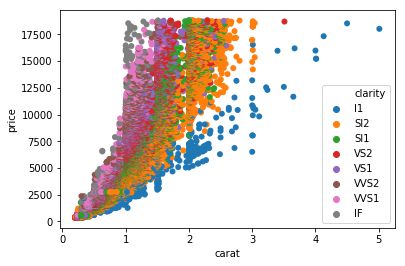

In [48]:
# Load the example iris dataset
diamonds = sns.load_dataset("diamonds")

clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity",
                #style='clarity', redundant encoding
                hue_order=clarity_ranking,
                linewidth=0, # remove white edge
                data=diamonds)

/home/tlj/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


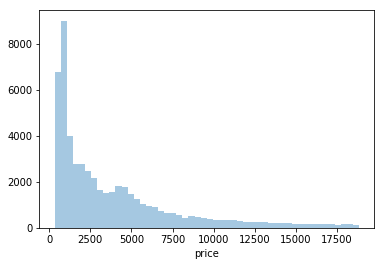

In [5]:
# histogram/density and kernel density estimate
sns.distplot(diamonds['price'], kde=False)

## Working with data from Danmarks Statistik
- Education - parents/children relation
- Pre-proccesed, ../data_examples/education.ipynb
  * Getting data from DST API
  * Selecting year=2018
  * Only selecting cumulated values (in total, and not per age)

In [6]:
import requests
url = 'https://api.statbank.dk/v1/tableinfo'
params = {"lang": "en", "table": "STATUS46", "format": "JSON"}
resp = requests.post(url, data=params)
j = resp.json()

In [7]:
j['variables']

[{'id': 'STATUSVID',
  'text': 'status for higher education',
  'elimination': True,
  'time': False,
  'values': [{'id': '400', 'text': 'TOTAL'},
   {'id': '110', 'text': 'COMPLETED HIGHER EDUCATION'},
   {'id': '210', 'text': 'UNDERGOING HIGHER EDUCATION'},
   {'id': '310', 'text': 'NO HIGHER EDUCATION'},
   {'id': '350', 'text': 'DISCONTINUED HIGHER EDUCATION'},
   {'id': '360', 'text': 'NOT STATED'}]},
 {'id': 'ALDER',
  'text': 'age',
  'elimination': True,
  'time': False,
  'values': [{'id': 'IALT', 'text': 'Total'},
   {'id': '25', 'text': '25 years'},
   {'id': '26', 'text': '26 years'},
   {'id': '27', 'text': '27 years'},
   {'id': '28', 'text': '28 years'},
   {'id': '29', 'text': '29 years'},
   {'id': '30', 'text': '30 years'},
   {'id': '31', 'text': '31 years'},
   {'id': '32', 'text': '32 years'},
   {'id': '33', 'text': '33 years'},
   {'id': '34', 'text': '34 years'},
   {'id': '35', 'text': '35 years'},
   {'id': '36', 'text': '36 years'},
   {'id': '37', 'text': '3

In [8]:
dataparams = {"lang": "en", "table": "STATUS46", "format": "JSONSTAT",
       "valuePresentation": "Value",
       "variables": [
          {"code": "Tid", "values": ["2018"]},
          {"code": "STATUSVID", "values": ["*"]},
          {"code": "FORBESK", "values": ["*"]},
          {"code": "ALDER", "values": ["IALT"]}
       ]
}

In [9]:
urldata = 'https://api.statbank.dk/v1/data'
resp = requests.post(urldata, json=dataparams)

In [10]:
jdata = resp.json()

In [21]:
# pip install pyjstat
from pyjstat import pyjstat

In [17]:
dataset = pyjstat.Dataset.read(resp.text)

In [19]:
df = dataset.write('dataframe')

/home/tlj/anaconda3/lib/python3.7/site-packages/pyjstat/pyjstat.py:250: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  dim_label = pd.merge(dim_label, dim_index, on='id').sort_index(by='index')


In [20]:
df

,status for higher education,age,parents employment status,Indhold,time,value
0,TOTAL,Total,TOTAL,25-45 year-olds,2018,1526116
1,TOTAL,Total,Both parents employed,25-45 year-olds,2018,920754
2,TOTAL,Total,One parent employed,25-45 year-olds,2018,265571
3,TOTAL,Total,No parent employed,25-45 year-olds,2018,94181
4,TOTAL,Total,No registration,25-45 year-olds,2018,245610
5,COMPLETED HIGHER EDUCATION,Total,TOTAL,25-45 year-olds,2018,579589
6,COMPLETED HIGHER EDUCATION,Total,Both parents employed,25-45 year-olds,2018,439118
7,COMPLETED HIGHER EDUCATION,Total,One parent employed,25-45 year-olds,2018,86386
8,COMPLETED HIGHER EDUCATION,Total,No parent employed,25-45 year-olds,2018,21071
9,COMPLETED HIGHER EDUCATION,Total,No registration,25-45 year-olds,2018,33014


In [24]:
#remove total
df = df[df['status for higher education'] != 'TOTAL']
df = df[df['parents employment status'] != 'TOTAL']

## [Seaborn](https://seaborn.pydata.org/)
* Build on top of Matplotlib - high level interface.
* More appealing aestics
* Less manual adjustments compared to Matplotlib
  * But adjustments are still with Matplotlib - Google is your friend

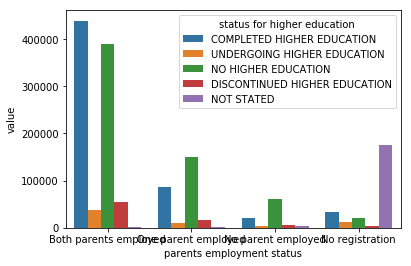

In [27]:
sns.barplot(x=df['parents employment status'], y=df['value'], hue=df['status for higher education'])

* What do we like/dislike?
* [The Principle of Propotional Ink](https://callingbullshit.org/tools/tools_proportional_ink.html)
* Entering an iterative process

[Text(0, 0, 'Both parents employed'),
 Text(0, 0, 'One parent employed'),
 Text(0, 0, 'No parent employed'),
 Text(0, 0, 'No registration')]

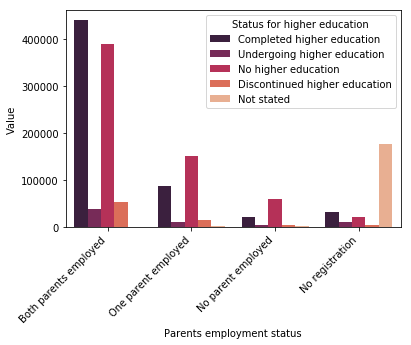

In [38]:
# 1. Change DataFrame
df.columns = df.columns.str.capitalize()
df['Status for higher education'] = df['Status for higher education'].str.capitalize()
# 1. Plot
bar = sns.barplot(x='Parents employment status', y='Value', hue='Status for higher education',
           data=df, palette="rocket")
# Keep labels but rotate
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')

In [39]:
# Saving
file = 'col_upper_case_status_for_higher_education_2018'
bar.get_figure().savefig('{}.jpg'.format(file))
bar.get_figure().savefig('{}.pdf'.format(file))
bar.get_figure().savefig('{}.png'.format(file))

# Visualization and preprocessing of survey data
* XML to Pandas DataFrames
* Plot with seaborn

In [40]:
from urllib.request import urlopen
import xml.etree.cElementTree as et

In [41]:
url = 'https://www.b.dk/upload/webred/bmsandbox/opinion_poll/2019/pollofpolls.xml'
xml_data = urlopen(url).read()
root = et.fromstring(xml_data)

## Wide vs. long format
- Wide: one row with several observations
- Long : one row = one observation
- [Tidy data](https://www.jstatsoft.org/index.php/jss/article/view/v059i10/v59i10.pdf)
  * Each variable must have its own column.
  * Each observation must have its own row.
  * Each value must have its own cell.

In [42]:
df = pd.DataFrame(columns=['datetime', 'party', 'percent'])
for child in root.iter('poll'):
    dt = pd.to_datetime(child.find('datetime').text)
    entries = child.find('entries')
    for entry in entries:
        d = dict()
        d['datetime'] = dt
        d['party'] = entry.find('party').find('letter').text
        d['percent'] = float(entry.find('percent').text)
        df = df.append(d, ignore_index=True)
df['party'] = df['party'].astype('category')

In [43]:
df

,datetime,party,percent
0,2019-11-17,A,27.1
1,2019-11-17,B,8.4
2,2019-11-17,C,7.0
3,2019-11-17,D,1.9
4,2019-11-17,F,8.0
5,2019-11-17,I,2.0
6,2019-11-17,K,1.2
7,2019-11-17,O,9.0
8,2019-11-17,V,23.8
9,2019-11-17,Ø,7.9


/home/tlj/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Percentage [%]')

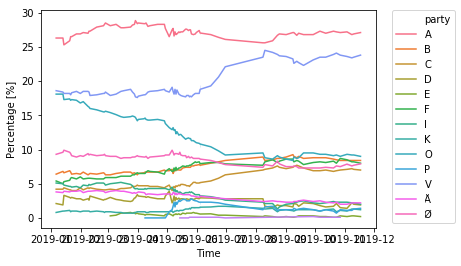

In [44]:
p = sns.lineplot(data=df, x='datetime', y='percent', hue='party')
p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set_xlabel('Time')
p.set_ylabel('Percentage [%]')

## References
[Fundamentals of Data Visualization, Wilke](https://serialmentor.com/dataviz/)

Edward R. Tufte, The Visual Display of Quantitive Information, Graphics Press, 1983

[The Principle of Propotional Ink, Carl Bergstrom and Jevin West](https://callingbullshit.org/tools/tools_proportional_ink.html)